<a href="https://colab.research.google.com/github/antonionipo/Iniciando-Analise-de-Dados/blob/main/Case_1_House_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Respondendo aos questionamentos

* A Questão de Negócio:
  - Qual a minha meta?
    > Achar o melhor custo benefício para a sua situação
  - Como posso chegar?
    > Escolhendo imóveis que vão de acordo com a sua característica
* O Entendimento do Negócio:
  - Eles são relevantes para o problema?
  - Eles me trazem uma solução direta?
  - Qual o meu setor ou range de negócio?
* A Coleta de Dados:
  - Os dados que eu tenho fazem sentido?
  - Estão no formato que eu gostaria?
  - O que mais eu consigo obter de informação destes dados?
* A Limpeza de Dados:
- Data
* A Exploração de Dados:
  - Visualização dos dados
  - Quais as minhas métricas essenciais




In [158]:
import pandas as pd
import seaborn as sns

In [159]:
aluguel_casa = pd.read_excel('houses_rent.xlsx')

In [160]:
aluguel_casa.head(10)

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200,42,28,2270
6,6,Barcelona,55,1,1,1,2,accept,furnished,1950,5000,375,64,7389
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300,67,17,1984
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000,109,26,2963
9,9,Barcelona,32,1,1,1,16,accept,not furnished,533,2900,0,37,3470


In [161]:
aluguel_casa.tail()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803
6079,6079,Barcelona,60,2,1,1,4,accept,furnished,489,1900,0,25,2414


In [162]:
aluguel_casa = aluguel_casa.rename(columns={"parking spaces":"parking_spaces", "rent amount":"rent_amount", "property tax":"property_tax", "fire insurance":"fire_insurance"})
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [163]:
aluguel_casa.dtypes

,0
index,int64
city,object
area,int64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


In [164]:
aluguel_casa.astype({"rent_amount":"float", "property_tax":"float", "fire_insurance":"float", "total":"float"})
aluguel_casa.dtypes

,0
index,int64
city,object
area,int64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


In [165]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [166]:
aluguel_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           6080 non-null   int64 
 1   city            6080 non-null   object
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking_spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent_amount     6080 non-null   int64 
 11  property_tax    6080 non-null   int64 
 12  fire_insurance  6080 non-null   int64 
 13  total           6080 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 665.1+ KB


In [167]:
aluguel_casa[["area", "rooms", "bathroom", "parking_spaces", "rent_amount", "property_tax", "fire_insurance", "total"]].describe()

,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


In [168]:
# aluguel_casa = aluguel_casa.query("rooms > 1 and animal == 'accept'")
# aluguel_casa.head()

In [169]:
aluguel_casa = aluguel_casa[(aluguel_casa["total"] <= 4000) & (aluguel_casa["animal"] == "accept") & ((aluguel_casa["rooms"] == 2) | (aluguel_casa["rooms"] == 3))]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300,67,17,1984
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000,109,26,2963
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950,11,13,1319


In [170]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,3003.132907,100.432836,2.379531,1.653873,1.212509,1964.006397,95.678749,25.899787,2556.358209
std,1739.608911,340.999109,0.485443,0.745034,0.973862,692.152422,107.359160,11.078694,783.028975
min,1.000000,30.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1453.000000,60.000000,2.000000,1.000000,1.000000,1445.500000,1.500000,17.000000,1962.500000
50%,3001.000000,76.000000,2.000000,2.000000,1.000000,1900.000000,67.000000,25.000000,2507.000000
75%,4518.500000,100.000000,3.000000,2.000000,2.000000,2450.000000,144.000000,32.000000,3181.500000
max,6079.000000,12732.000000,3.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,3998.000000


In [171]:
agg_city_price = aluguel_casa.groupby('city')['total'].agg('mean').reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


In [172]:
agg_bath_room_price = aluguel_casa.groupby(['bathroom', 'rooms'])['total'].agg('mean').reset_index()
agg_bath_room_price.head()

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000


[Text(0.5, 1.0, 'Aluguel por quantidade de quartos'),
 Text(0.5, 0, 'Quantidade de quartos'),
 Text(0, 0.5, 'Aluguel médio')]

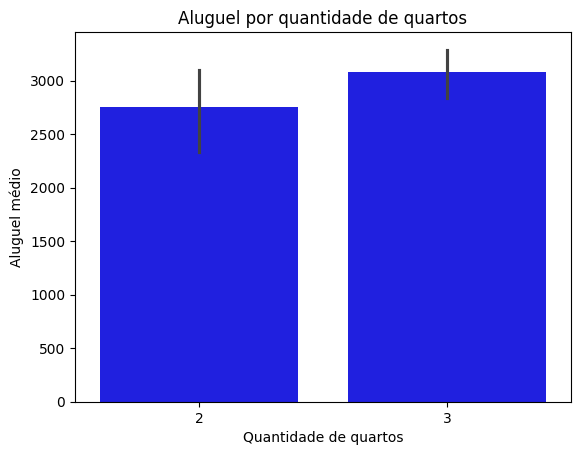

In [173]:
ax1 = sns.barplot(data=agg_bath_room_price, x='rooms', y='total', color='blue')
ax1.set(title='Aluguel por quantidade de quartos', xlabel='Quantidade de quartos', ylabel='Aluguel médio')

[Text(0.5, 1.0, 'Aluguel por quantidade de banheiros'),
 Text(0.5, 0, 'Quantidade de banheiros'),
 Text(0, 0.5, 'Aluguel médio')]

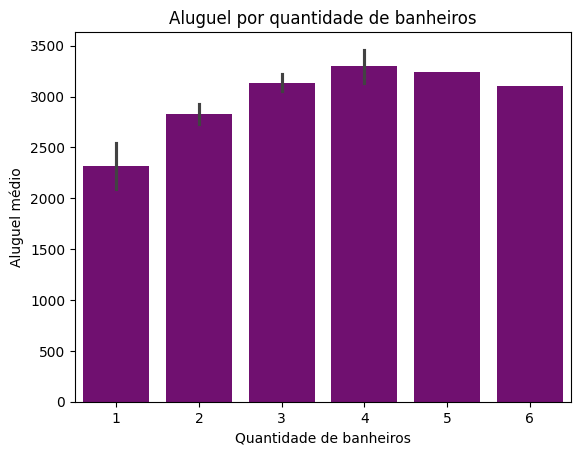

In [174]:
ax2 = sns.barplot(data=agg_bath_room_price, x='bathroom', y='total', color='purple')
ax2.set(title='Aluguel por quantidade de banheiros', xlabel='Quantidade de banheiros', ylabel='Aluguel médio')

[Text(0.5, 1.0, 'Distribuição da área dos imóveis'),
 Text(0.5, 0, 'Área'),
 Text(0, 0.5, 'Quantidade')]

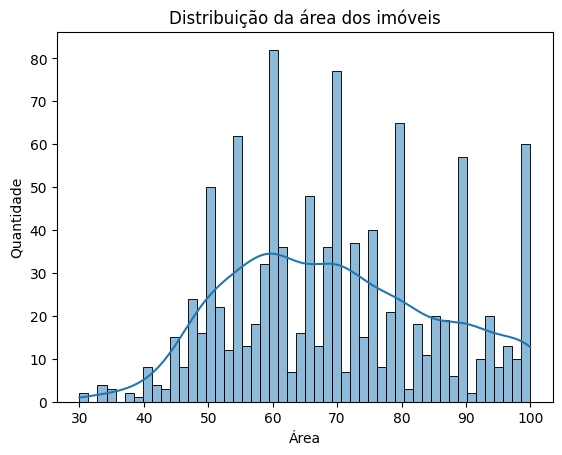

In [175]:
agg_area = aluguel_casa[['area']]
agg_area = agg_area.query("area <= 100")
# agg_area.describe()
ax3 = sns.histplot(data=agg_area, x='area', bins=50, kde=True)
ax3.set(title='Distribuição da área dos imóveis', xlabel='Área', ylabel='Quantidade')

<Axes: xlabel='total', ylabel='Count'>

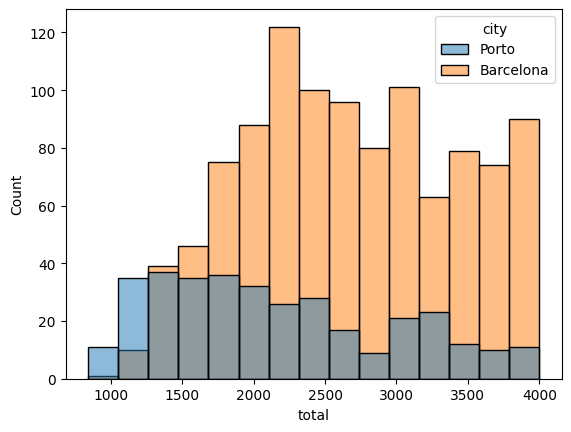

In [176]:
sns.histplot(data=aluguel_casa, x='total', hue='city')

In [177]:
aluguel_casa = aluguel_casa.query("city == 'Porto'")
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,2984.862974,128.889213,2.481050,1.597668,1.381924,1568.731778,91.655977,21.166181,2161.947522
std,1765.093849,684.179001,0.500371,0.701873,1.063713,687.146046,81.422431,10.449199,803.341044
min,1.000000,40.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1433.500000,60.000000,2.000000,1.000000,1.000000,1060.500000,39.500000,13.000000,1494.000000
50%,3052.000000,76.000000,2.000000,1.000000,1.000000,1350.000000,75.000000,18.000000,2017.000000
75%,4522.000000,101.500000,3.000000,2.000000,2.000000,2000.000000,120.500000,26.000000,2738.500000
max,6055.000000,12732.000000,3.000000,4.000000,8.000000,3500.000000,600.000000,53.000000,3994.000000


In [178]:
aluguel_casa.groupby("floor").value_counts().sort_values(ascending=False)

floor  index  city   area  rooms  bathroom  parking_spaces  animal  furniture      hoa      rent_amount  property_tax  fire_insurance  total
1      15     Porto  56    2      1         1               accept  not furnished  345      950          11            13              1319     1
10     264    Porto  74    3      2         1               accept  not furnished  700      1800         120           23              2643     1
11     2414   Porto  92    3      3         2               accept  not furnished  780      1700         167           22              2669     1
       2402   Porto  75    2      1         1               accept  not furnished  670      1100         80            14              1864     1
       2037   Porto  147   3      2         3               accept  not furnished  1425     1620         184           21              3250     1
                                                                                                                                               ..
3      3846   Porto  60    2      1         1               accept  not furnished  505      450          48            6               1009     1
       3814   Porto  58    2      1         1               accept  not furnished  289      950          11            13              1263     1
       3763   Porto  84    3      1         1               accept  not furnished  950      1200         147           16              2313     1
       3698   Porto  100   3      2         2               accept  not furnished  885      1200         80            16              2181     1
-      6055   Porto  306   3      2         2               accept  not furnished  Incluso  2500         422           38              2960     1
Name: count, Length: 343, dtype: int64

In [179]:
agg_floor_price = aluguel_casa.groupby('floor')['total'].agg('mean').reset_index()
agg_floor_price

,floor,total
0,1,2004.096154
1,2,1745.322581
2,3,1709.921569
3,4,1872.923077
4,5,2385.812500
5,6,2331.307692
6,7,2340.750000
7,8,2744.714286
8,9,2941.111111
9,10,1946.666667


<Axes: xlabel='floor', ylabel='total'>

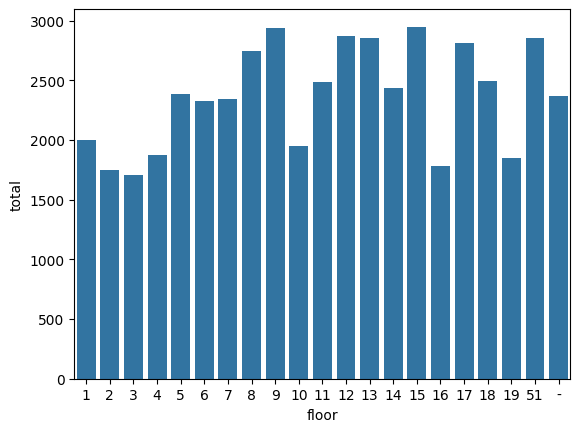

In [181]:
sns.barplot(data=agg_floor_price, x='floor', y='total')

In [185]:
six_teen_floor = aluguel_casa.query("floor == 16")
six_teen_floor

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900,61,12,1523
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200,89,16,2035
